## 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size = 100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

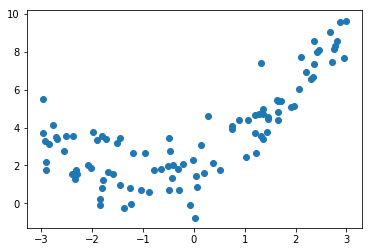

In [5]:
plt.scatter(x,y)
plt.show()

## 过拟合

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [7]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [8]:
from sklearn.metrics import  mean_squared_error

In [9]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y,y100_predict)

0.68728961485464657

### 虽然均方误差很小 但是其实已经过拟合了

In [12]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

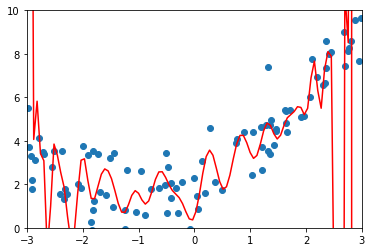

In [15]:
plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,10])
plt.show()

### 模型泛化能力差

### train test split的意义

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [20]:
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.2199965269396573

In [22]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.80356410562978997

In [25]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)

0.92129307221507906

In [26]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075796398.031963